In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+r%C3%A9gularis%C3%A9es/gene+data/data_lasso.csv",)
dataset.head()

,Unnamed: 0.1,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,12.408154
1,1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,13.414970
2,2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,13.566183
3,3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,12.943886
4,4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,91.307146


The two first columns are useless, find a way to get rid of them.

In [6]:
# Sélection de toutes les features sauf les deux premières colonnes
dataset_filtered = dataset.iloc[:,2:]
dataset_filtered.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,12.408154
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,13.414970
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,13.566183
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,12.943886
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,91.307146


# Exploration
Print some information about the dataset. Do you notice something unusual ?


In [8]:
# Affichage du nombre de lignes dans le dataset
print(f"Number of rows: {dataset_filtered.shape[0]}\n")
print(f"Number of columns: {dataset_filtered.shape[1]}\n")

# Affichage des premières lignes du dataset filtré
print("Display of dataset (first 5 rows):")
display(dataset_filtered.head())
print()

# Statistiques descriptives de base pour le dataset
print("Basic statistics: ")
data_desc = dataset_filtered.describe(include='all')
display(data_desc)
print()

# Calcul et affichage du pourcentage de valeurs manquantes par colonne
print("Percentage of missing values per column: ")
missing_values = (100 * dataset_filtered.isnull().sum() / dataset_filtered.shape[0]).round(2)
display(missing_values)

Number of rows: 801

Number of columns: 20532

Display of dataset (first 5 rows):


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,12.408154
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,13.414970
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,13.566183
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,12.943886
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,91.307146



Basic statistics: 


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411,41.219409
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529,37.655049
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000,11.433002
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000,13.415959
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000,89.166837
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133,100.000000



Percentage of missing values per column: 


gene_0        0.0
gene_1        0.0
gene_2        0.0
gene_3        0.0
gene_4        0.0
             ... 
gene_20527    0.0
gene_20528    0.0
gene_20529    0.0
gene_20530    0.0
target        0.0
Length: 20532, dtype: float64

There are more than 20k features in this dataset 🤯 Actually, it's very common in genetics.

Make sure there are no missing values at all in the whole dataset

In [9]:
if not dataset_filtered.isnull().any().any():
    print("No missing values found in the dataset.")
else:
    print("There are missing values in the dataset.")

No missing values found in the dataset.


# Preparing the data for machine learning
Separate the target from the features

In [10]:
# Séparation de la variable cible et des caractéristiques
print("Separating labels from features...")
target_variable = "target"

# Vérification de l'existence de la variable cible dans le jeu de données
if target_variable in dataset_filtered.columns:
    X = dataset_filtered.drop(columns=[target_variable])
    y = dataset_filtered[target_variable]
    print("...Done.\n")

    print("y (Target Variable):")
    print(y.head(), "\n")
    
    print("X (Features):")
    print(X.head())
else:
    print(f"Error: The target variable '{target_variable}' does not exist in the dataset.")

Separating labels from features...
...Done.

y (Target Variable):
0    12.408154
1    13.414970
2    13.566183
3    12.943886
4    91.307146
Name: target, dtype: float64 

X (Features):
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.360982     0.0  

Make a train/test splitting

In [11]:
# Division du dataset en ensembles d'entraînement et de test
print("Dividing dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Train set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")
print("...Done.\n")

Dividing dataset into train and test sets...
Train set: 640 samples, Test set: 161 samples
...Done.



# Preprocessing
What preprocessings are necessary here ? Apply them to the features

In [12]:
print(dataset_filtered.dtypes)

gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
               ...   
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
target        float64
Length: 20532, dtype: object


In [13]:
# Détection automatique des colonnes numériques et catégorielles
numeric_features = [col for col in X.columns if X[col].dtype in ['float64', 'int64']]
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

print("Found numeric features:", numeric_features)
print("Found categorical features:", categorical_features)

Found numeric features: ['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7', 'gene_8', 'gene_9', 'gene_10', 'gene_11', 'gene_12', 'gene_13', 'gene_14', 'gene_15', 'gene_16', 'gene_17', 'gene_18', 'gene_19', 'gene_20', 'gene_21', 'gene_22', 'gene_23', 'gene_24', 'gene_25', 'gene_26', 'gene_27', 'gene_28', 'gene_29', 'gene_30', 'gene_31', 'gene_32', 'gene_33', 'gene_34', 'gene_35', 'gene_36', 'gene_37', 'gene_38', 'gene_39', 'gene_40', 'gene_41', 'gene_42', 'gene_43', 'gene_44', 'gene_45', 'gene_46', 'gene_47', 'gene_48', 'gene_49', 'gene_50', 'gene_51', 'gene_52', 'gene_53', 'gene_54', 'gene_55', 'gene_56', 'gene_57', 'gene_58', 'gene_59', 'gene_60', 'gene_61', 'gene_62', 'gene_63', 'gene_64', 'gene_65', 'gene_66', 'gene_67', 'gene_68', 'gene_69', 'gene_70', 'gene_71', 'gene_72', 'gene_73', 'gene_74', 'gene_75', 'gene_76', 'gene_77', 'gene_78', 'gene_79', 'gene_80', 'gene_81', 'gene_82', 'gene_83', 'gene_84', 'gene_85', 'gene_86', 'gene_87', 'gene_88', 'gene_

In [14]:
# Pipeline de transformation pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Remplace les valeurs manquantes par la moyenne des colonnes
    ('scaler', StandardScaler())  # Met à l'échelle les données en les centrant et les réduisant
])

print("Numeric feature transformer pipeline created.")

Numeric feature transformer pipeline created.


In [15]:
# Création de l'objet de prétraitement qui applique les transformations aux colonnes numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),     # Applique le pipeline numérique aux caractéristiques numériques
    ]
)

print("Preprocessor object created with transformations for numeric features.")

Preprocessor object created with transformations for numeric features.


In [16]:
# Prétraitement sur l'ensemble d'entraînement
print("Performing preprocessing on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")

# Convertit en DataFrame pour garder les noms de colonnes après transformation
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
print(X_train.head())

print()

# Prétraitement sur l'ensemble de test
print("Performing preprocessing on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)  # Ne pas refit ici
print("...Done.")

# Convertit en DataFrame pour garder les noms de colonnes après transformation
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
print(X_test.head())
print()

Performing preprocessing on train set...
      gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
364  0.00000  0.000000  2.275752  6.025051  10.181674     0.0  6.112777   
458  0.75745  1.915330  1.182565  6.282078   8.972058     0.0  5.440902   
76   0.00000  3.195537  2.275156  5.719778   9.145591     0.0  7.333683   
64   0.00000  2.949311  4.597877  7.095460   9.762425     0.0  6.493412   
638  0.00000  3.777693  3.417920  7.031164   9.960924     0.0  8.119844   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
364  0.565890     0.0     0.0  ...    5.402804    7.875964   10.120121   
458  0.000000     0.0     0.0  ...    7.455081    8.825525   10.021993   
76   1.192762     0.0     0.0  ...    6.534924    9.382676    9.893725   
64   0.000000     0.0     0.0  ...    6.066335    9.048356   10.287493   
638  0.605020     0.0     0.0  ...    6.012622    9.200089   10.349337   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528

# Ridge

Let's focus on Ridge regularization. We'll train 3 Ridge regressors with different values of the strength α, and analyze the performances as well as the influence on the model's coefficients.

Declare an instance of the Ridge class with α =1. Save this instance for later analysis into an object called ridge1. Train the model and display its R2-score on train and test sets.

In [21]:
# 3-fold cross-validation avec modèle Ridge pour évaluer le score R2
print("Performing 3-fold cross-validation with Ridge regression...")
ridge1 = Ridge()
scores = cross_val_score(ridge1, X_train, y_train, cv=3, scoring='r2')

print(f'The mean cross-validated R2-score is: {scores.mean():.4f}')
print(f'The standard deviation of R2-scores is: {scores.std():.4f}')

Performing 3-fold cross-validation with Ridge regression...
The mean cross-validated R2-score is: 0.9808
The standard deviation of R2-scores is: 0.0027


In [24]:
# Recherche par grille (Grid Search) pour la régression Ridge
print("Performing grid search with cross-validation for Ridge regression...")

# Grille des valeurs de l'hyperparamètre alpha à tester
params = {
    'alpha': [1.0]
}

# Configuration de la recherche par grille avec validation croisée
gridsearch1 = GridSearchCV(estimator=ridge1, param_grid=params, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gridsearch1.fit(X_train, y_train)

print("...Done.")
print("Best hyperparameters:", gridsearch1.best_params_)
print(f"Best cross-validated R2 score: {gridsearch1.best_score_:.4f}")

# Print R^2 scores
print("R2 score on training set : ", gridsearch1.score(X_train, y_train))
print("R2 score on test set : ", gridsearch1.score(X_test, y_test))

Performing grid search with cross-validation for Ridge regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
...Done.
Best hyperparameters: {'alpha': 1.0}
Best cross-validated R2 score: 0.9808
R2 score on training set :  0.9999999996538701
R2 score on test set :  0.9867318246730055


Declare an instance of the Ridge class with α = 1000000. Save this instance for later analysis into an object called ridge2. Train the model and display its R2-score on train and test sets.

In [25]:
# 3-fold cross-validation avec modèle Ridge pour évaluer le score R2
print("Performing 3-fold cross-validation with Ridge regression...")
ridge2 = Ridge()
scores = cross_val_score(ridge2, X_train, y_train, cv=3, scoring='r2')

print(f'The mean cross-validated R2-score is: {scores.mean():.4f}')
print(f'The standard deviation of R2-scores is: {scores.std():.4f}')

Performing 3-fold cross-validation with Ridge regression...
The mean cross-validated R2-score is: 0.9808
The standard deviation of R2-scores is: 0.0027


In [26]:
# Recherche par grille (Grid Search) pour la régression Ridge
print("Performing grid search with cross-validation for Ridge regression...")

# Grille des valeurs de l'hyperparamètre alpha à tester
params = {
    'alpha': [1000000]
}

# Configuration de la recherche par grille avec validation croisée
gridsearch2 = GridSearchCV(estimator=ridge2, param_grid=params, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gridsearch2.fit(X_train, y_train)

print("...Done.")
print("Best hyperparameters:", gridsearch2.best_params_)
print(f"Best cross-validated R2 score: {gridsearch2.best_score_:.4f}")

# Print R^2 scores
print("R2 score on training set : ", gridsearch2.score(X_train, y_train))
print("R2 score on test set : ", gridsearch2.score(X_test, y_test))

Performing grid search with cross-validation for Ridge regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
...Done.
Best hyperparameters: {'alpha': 1000000}
Best cross-validated R2 score: 0.5155
R2 score on training set :  0.6372217335752034
R2 score on test set :  0.6308098494269019


Declare an instance of the Ridge class with α=100000000. Save this instance for later analysis into an object called ridge3 . Train the model and display its R2-score on train and test sets.

In [27]:
# 3-fold cross-validation avec modèle Ridge pour évaluer le score R2
print("Performing 3-fold cross-validation with Ridge regression...")
ridge3 = Ridge()
scores = cross_val_score(ridge3, X_train, y_train, cv=3, scoring='r2')

# Recherche par grille (Grid Search) pour la régression Ridge
print("Performing grid search with cross-validation for Ridge regression...")

# Grille des valeurs de l'hyperparamètre alpha à tester
params = {
    'alpha': [100000000]
}

# Configuration de la recherche par grille avec validation croisée
gridsearch3 = GridSearchCV(estimator=ridge3, param_grid=params, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gridsearch3.fit(X_train, y_train)

print("...Done.")
print("Best hyperparameters:", gridsearch3.best_params_)
print(f"Best cross-validated R2 score: {gridsearch3.best_score_:.4f}")

# Print R^2 scores
print("R2 score on training set : ", gridsearch3.score(X_train, y_train))
print("R2 score on test set : ", gridsearch3.score(X_test, y_test))

Performing 3-fold cross-validation with Ridge regression...
Performing grid search with cross-validation for Ridge regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
...Done.
Best hyperparameters: {'alpha': 100000000}
Best cross-validated R2 score: 0.0090
R2 score on training set :  0.015173529447411016
R2 score on test set :  0.0032484988744883037


How do the scores vary when alpha changes? Can you explain what's happening?

One can notice a decrease in R2 when the penalization parameter α increases. This is completely aligned with the theory, the penalization parameter α increases the bias of the model, which is the average prediction error of the model, leading to higher Sum of Square Residual (SSR) and therefore lower R2.

Extract the coefficients of each of the three Ridge models, and store them into a DataFrame

refaisons sans la validation croisée puisque nous n'avons qu'un hyperparamètre

In [32]:
# Différentes valeurs d'alpha pour chaque modèle
alphas = [1, 1000000, 100000000]
ridge_models = {}
r2_scores = {"Model": [], "Alpha": [], "R2 Train Score": [], "R2 Test Score": []}

# Entraînement de chaque modèle avec son alpha et calcul des scores
for i, alpha in enumerate(alphas, 1):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Stocker le modèle et les scores
    ridge_models[f"Ridge{i}"] = model
    r2_scores["Model"].append(f"Ridge{i}")
    r2_scores["Alpha"].append(alpha)
    r2_scores["R2 Train Score"].append(model.score(X_train, y_train))
    r2_scores["R2 Test Score"].append(model.score(X_test, y_test))

# Conversion des scores en DataFrame pour un affichage structuré
df_r2_scores = pd.DataFrame(r2_scores)
print(df_r2_scores)

    Model      Alpha  R2 Train Score  R2 Test Score
0  Ridge1          1        1.000000       0.986732
1  Ridge2    1000000        0.637222       0.630810
2  Ridge3  100000000        0.015174       0.003248


In [37]:
# Extraire les coefficients de chaque modèle entraîné dans la boucle
coefficients_ridge = {
    "Ridge1": ridge_models["Ridge1"].coef_,
    "Ridge2": ridge_models["Ridge2"].coef_,
    "Ridge3": ridge_models["Ridge3"].coef_
}

# Créer le DataFrame pour afficher les coefficients
df_coefficients_ridge = pd.DataFrame(coefficients_ridge)
print(df_coefficients_ridge)

         Ridge1    Ridge2    Ridge3
0     -0.018817 -0.001181 -0.000022
1     -0.003487 -0.001862 -0.000018
2     -0.011201 -0.003263 -0.000048
3     -0.005925 -0.000533 -0.000004
4     -0.005402  0.003480  0.000061
...         ...       ...       ...
20526  0.009740  0.001154  0.000005
20527  0.005615 -0.000088 -0.000002
20528 -0.001791  0.002628  0.000061
20529  0.031726  0.003789  0.000059
20530  0.012814 -0.000356 -0.000009

[20531 rows x 3 columns]


Plot the coefficients of the three models in the same figure. What do you notice?

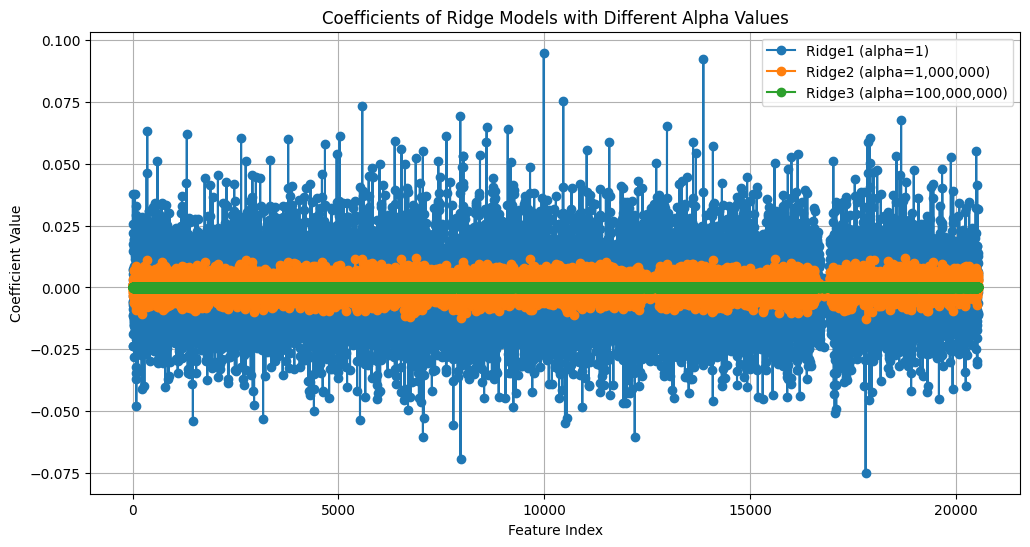

In [38]:
import matplotlib.pyplot as plt

# Création de la figure
plt.figure(figsize=(12, 6))

# Tracé des coefficients pour chaque modèle
plt.plot(df_coefficients_ridge['Ridge1'], label='Ridge1 (alpha=1)', linestyle='-', marker='o')
plt.plot(df_coefficients_ridge['Ridge2'], label='Ridge2 (alpha=1,000,000)', linestyle='-', marker='o')
plt.plot(df_coefficients_ridge['Ridge3'], label='Ridge3 (alpha=100,000,000)', linestyle='-', marker='o')

# Paramètres du graphique
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Ridge Models with Different Alpha Values")
plt.legend()
plt.grid(True)
plt.show()

With Ridge regularization, when α increases, all the values of the coefficients decrease.

# Lasso
Let's make the same study with Lasso regularization.

In [39]:
# Différentes valeurs d'alpha pour chaque modèle Lasso
alphas = [1, 30, 100]
lasso_models = {}
r2_scores = {"Model": [], "Alpha": [], "R2 Train Score": [], "R2 Test Score": []}

# Entraînement de chaque modèle avec son alpha et calcul des scores
for i, alpha in enumerate(alphas, 1):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Stocker le modèle et les scores
    lasso_models[f"Lasso{i}"] = model
    r2_scores["Model"].append(f"Lasso{i}")
    r2_scores["Alpha"].append(alpha)
    r2_scores["R2 Train Score"].append(model.score(X_train, y_train))
    r2_scores["R2 Test Score"].append(model.score(X_test, y_test))

# Conversion des scores en DataFrame pour un affichage structuré
df_r2_scores = pd.DataFrame(r2_scores)
print(df_r2_scores)

    Model  Alpha  R2 Train Score  R2 Test Score
0  Lasso1      1        0.986761       0.985045
1  Lasso2     30        0.195310       0.184080
2  Lasso3    100        0.000000      -0.012180


In [40]:
# Extraire les coefficients de chaque modèle entraîné dans la boucle
coefficients_lasso = {
    "Lasso1": lasso_models["Lasso1"].coef_,
    "Lasso2": lasso_models["Lasso2"].coef_,
    "Lasso3": lasso_models["Lasso3"].coef_
}

# Créer le DataFrame pour afficher les coefficients
df_coefficients_lasso = pd.DataFrame(coefficients_lasso)
print(df_coefficients_lasso)

       Lasso1  Lasso2  Lasso3
0        -0.0    -0.0    -0.0
1        -0.0    -0.0    -0.0
2        -0.0    -0.0    -0.0
3         0.0    -0.0    -0.0
4         0.0     0.0     0.0
...       ...     ...     ...
20526     0.0     0.0     0.0
20527     0.0    -0.0    -0.0
20528     0.0     0.0     0.0
20529     0.0     0.0     0.0
20530    -0.0    -0.0    -0.0

[20531 rows x 3 columns]


We get the same effect as with Ridge : when α increases, R2 decreases.

Plot the coefficients of the three models in the same figure. What do you notice?

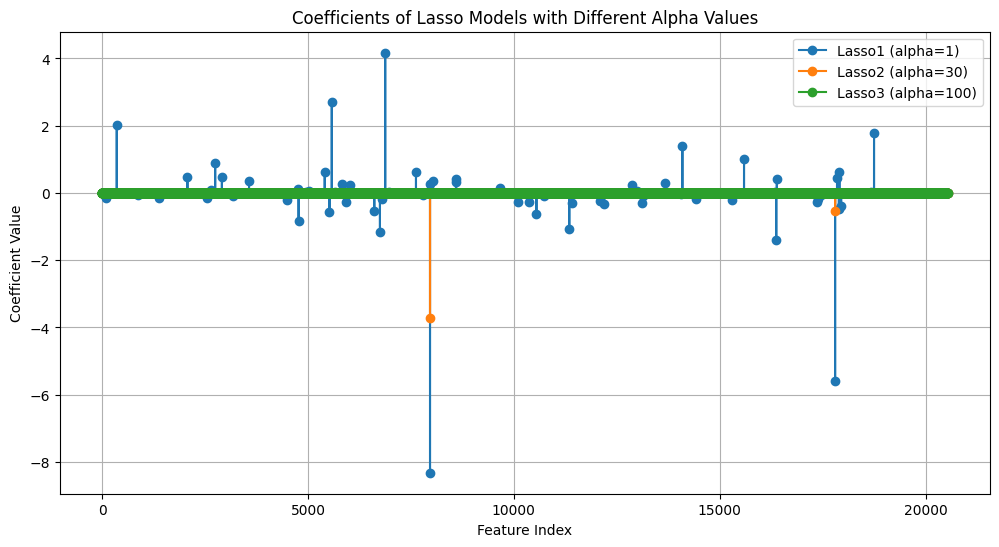

In [41]:
# Création de la figure
plt.figure(figsize=(12, 6))

# Tracé des coefficients pour chaque modèle
plt.plot(df_coefficients_lasso['Lasso1'], label='Lasso1 (alpha=1)', linestyle='-', marker='o')
plt.plot(df_coefficients_lasso['Lasso2'], label='Lasso2 (alpha=30)', linestyle='-', marker='o')
plt.plot(df_coefficients_lasso['Lasso3'], label='Lasso3 (alpha=100)', linestyle='-', marker='o')

# Paramètres du graphique
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Lasso Models with Different Alpha Values")
plt.legend()
plt.grid(True)
plt.show()

Contrary to Ridge, Lasso regularization assigns many of the model's coefficients exactly to zero. The higher α is, the more coefficients are cancelled in the model.

Contrairement à Ridge, la régularisation Lasso attribue exactement la valeur zéro à de nombreux coefficients du modèle. Plus la valeur de α est élevée, plus le nombre de coefficients annulés dans le modèle augmente.

# Hyperparameter optimization

Use grid search to find the best value for α, for Ridge and then for Lasso. You can test the following list of values:

Ridge: α= [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

Lasso: α= [1, 2, 3, 5, 10, 20, 30]

In [44]:
# Définir les plages de valeurs d'alpha pour Ridge et Lasso
ridge_alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
lasso_alphas = [1, 2, 3, 5, 10, 20, 30]

# Recherche par grille pour Ridge
ridge_grid = GridSearchCV(estimator=Ridge(), param_grid={'alpha': ridge_alphas}, cv=5, scoring='r2', n_jobs=-1, verbose=1)
ridge_grid.fit(X_train, y_train)

# Meilleure valeur d'alpha pour Ridge
print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])
print("Best R2 score for Ridge:", ridge_grid.best_score_)

# Ligne vide pour séparer les résultats
print()

# Recherche par grille pour Lasso
lasso_grid = GridSearchCV(estimator=Lasso(), param_grid={'alpha': lasso_alphas}, cv=5, scoring='r2', n_jobs=-1, verbose=1)
lasso_grid.fit(X_train, y_train)

# Meilleure valeur d'alpha pour Lasso
print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])
print("Best R2 score for Lasso:", lasso_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best alpha for Ridge: 0.01
Best R2 score for Ridge: 0.9828796931032031

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best alpha for Lasso: 1
Best R2 score for Lasso: 0.97899787046442


# Comparing models
Display the scores on train set and test set for the best Ridge and for the best Lasso model.

In [45]:
# Meilleur modèle Ridge et Lasso extraits de GridSearchCV
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Scores pour le meilleur modèle Ridge
ridge_train_score = best_ridge.score(X_train, y_train)
ridge_test_score = best_ridge.score(X_test, y_test)
print("Best Ridge model:")
print("R2 score on training set:", ridge_train_score)
print("R2 score on test set:", ridge_test_score)

# Ligne vide pour séparation
print()

# Scores pour le meilleur modèle Lasso
lasso_train_score = best_lasso.score(X_train, y_train)
lasso_test_score = best_lasso.score(X_test, y_test)
print("Best Lasso model:")
print("R2 score on training set:", lasso_train_score)
print("R2 score on test set:", lasso_test_score)

Best Ridge model:
R2 score on training set: 0.9999999999999654
R2 score on test set: 0.9867323625624246

Best Lasso model:
R2 score on training set: 0.9867613949642098
R2 score on test set: 0.9850452712018385


Plot the coefficients of the best Ridge and best Lasso models in the same figure. If you had to deploy a model in production, which one would you choose and why?

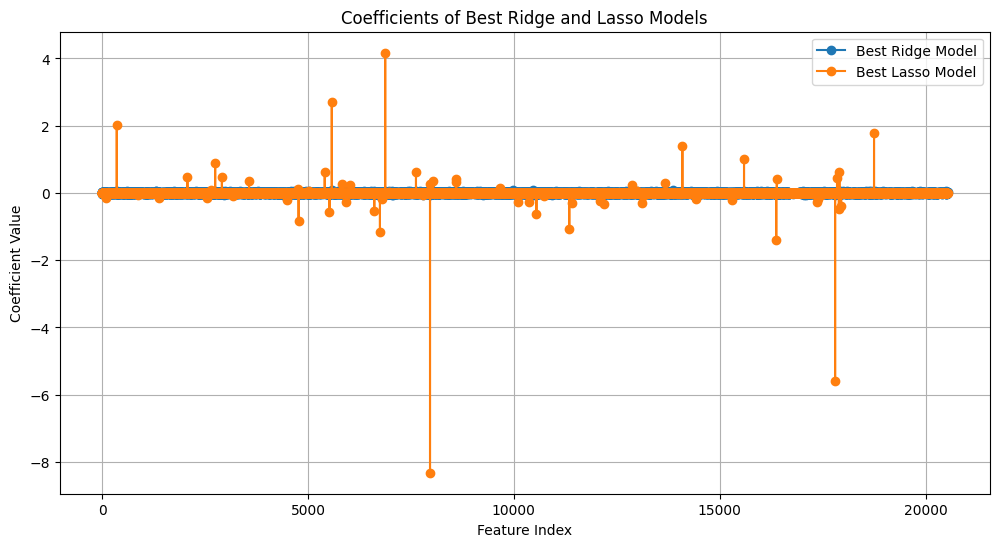

In [46]:
# Extraire les coefficients des meilleurs modèles
ridge_coefficients = best_ridge.coef_
lasso_coefficients = best_lasso.coef_

# Création d'un DataFrame pour faciliter le tracé
df_coefficients = pd.DataFrame({
    "Best Ridge Coefficients": ridge_coefficients,
    "Best Lasso Coefficients": lasso_coefficients
})

# Tracé des coefficients
plt.figure(figsize=(12, 6))
plt.plot(df_coefficients["Best Ridge Coefficients"], label='Best Ridge Model', linestyle='-', marker='o')
plt.plot(df_coefficients["Best Lasso Coefficients"], label='Best Lasso Model', linestyle='-', marker='o')

# Paramètres du graphique
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Best Ridge and Lasso Models")
plt.legend()
plt.grid(True)
plt.show()

With this dataset, Lasso reaches the same performances as Ridge, by using only a few subset of the features, instead of the < 20.000 initial features. We'd better use Lasso, which would be lighter to save in memory.

Avec ce jeu de données, Lasso atteint les mêmes performances que Ridge, en utilisant seulement un petit sous-ensemble des caractéristiques, au lieu des moins de 20 000 caractéristiques initiales. Il serait préférable d’utiliser Lasso, qui serait plus léger à sauvegarder en mémoire.

# Using Lasso as an automated feature selection method

Let's focus on the best Lasso model. Only a few features have non-zero coefficients, which means that we could train a model by including only these features, and still get the same performances.

Extract the names of the features that have non-zero coefficients in Lasso.

In [49]:
feature_names = X_train.columns.tolist()

# Extraire les indices des caractéristiques ayant des coefficients non nuls
non_zero_indices = np.where(best_lasso.coef_ != 0)[0]

# Extraire les noms des caractéristiques non nulles
non_zero_feature_names = [feature_names[i] for i in non_zero_indices]

# Afficher les noms des caractéristiques non nulles
print("Features with non-zero coefficients in the best Lasso model:")
print(non_zero_feature_names)

Features with non-zero coefficients in the best Lasso model:
['num__gene_91', 'num__gene_357', 'num__gene_864', 'num__gene_1384', 'num__gene_1825', 'num__gene_2073', 'num__gene_2542', 'num__gene_2655', 'num__gene_2745', 'num__gene_2747', 'num__gene_2910', 'num__gene_3170', 'num__gene_3569', 'num__gene_4481', 'num__gene_4762', 'num__gene_4773', 'num__gene_4956', 'num__gene_5027', 'num__gene_5407', 'num__gene_5523', 'num__gene_5578', 'num__gene_5663', 'num__gene_5815', 'num__gene_5934', 'num__gene_6030', 'num__gene_6611', 'num__gene_6748', 'num__gene_6795', 'num__gene_6876', 'num__gene_6976', 'num__gene_7623', 'num__gene_7790', 'num__gene_7958', 'num__gene_7964', 'num__gene_8027', 'num__gene_8594', 'num__gene_8598', 'num__gene_9652', 'num__gene_10106', 'num__gene_10357', 'num__gene_10548', 'num__gene_10707', 'num__gene_10731', 'num__gene_11346', 'num__gene_11351', 'num__gene_11412', 'num__gene_11494', 'num__gene_12086', 'num__gene_12194', 'num__gene_12866', 'num__gene_12978', 'num__gene_

Filter the feature matrix X to keep only these features, make a new train/test splitting from this X matrix and do the preprocessing once again

In [55]:
# Filtrer X_train pour ne garder que les caractéristiques avec des coefficients non nuls
X_train_filtered = X_train[non_zero_feature_names]
X_test_filtered = X_test[non_zero_feature_names]

# Nouvelle division en ensembles d'entraînement et de test à partir de X filtré
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_filtered, y_train, test_size=0.2, random_state=42)

# Effectuer le prétraitement une nouvelle fois (par exemple, normalisation ou standardisation)
# Exemple avec StandardScaler si c'était le prétraitement utilisé :
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# Vérifier les dimensions des nouvelles matrices
print("Dimensions de X_train après filtrage et prétraitement:", X_train_new.shape)
print("Dimensions de X_test après filtrage et prétraitement:", X_test_new.shape)

# Affichage des 5 premières lignes de X_train_new et X_test_new sous forme de DataFrame
print("\nPreprocessing on train set (first 5 rows):")
print(pd.DataFrame(X_train_new[:5, :]))

print("\nPreprocessing on test set (first 5 rows):")
print(pd.DataFrame(X_test_new[:5, :]))

Dimensions de X_train après filtrage et prétraitement: (512, 76)
Dimensions de X_test après filtrage et prétraitement: (128, 76)

Preprocessing on train set (first 5 rows):
         0         1         2         3         4         5         6   \
0  1.542651 -0.742673  0.657914 -0.395151  0.600600 -1.308330  0.317520   
1 -0.860296  0.620004 -0.699226 -1.179218 -1.326507  0.753919 -0.584924   
2  0.986893 -0.742673  0.738755  0.651223 -0.556669  0.321922  0.601584   
3 -0.810103  1.365646 -0.699226 -0.774220 -1.766745  0.657880 -0.860420   
4 -0.163211 -0.742673 -0.699226  0.330139  0.841665  0.709953  0.639463   

         7         8         9   ...        66        67        68        69  \
0 -0.863821 -0.710825 -1.006853  ...  0.109732  0.948082 -0.577314  1.111921   
1  0.404540  1.221512  0.747793  ... -0.680855 -0.819718 -0.861625 -0.937966   
2  0.269686 -0.270040 -0.409581  ... -0.183498  1.253436  0.481912  2.043124   
3  1.131132 -0.223111  1.147773  ... -0.297814 -0.716474

In [59]:
# Entraîner un modèle de régression linéaire sans régularisation
regressor = LinearRegression()
regressor.fit(X_train_new, y_train_new)

# Calculer et afficher les scores R² pour l'ensemble d'entraînement et de test
print("Non-regularized Linear Regression Performance:")
print("R2 score on training set:", regressor.score(X_train_new, y_train_new))
print("R2 score on test set:", regressor.score(X_test_new, y_test_new))

Non-regularized Linear Regression Performance:
R2 score on training set: 0.9932746506755379
R2 score on test set: 0.9909700218995112


We reach the same almost-perfect scores by using only 76 features instead of the < 20.000 initial ones! Amazing, isn't it? 🥳

# Conclusion
Ridge and Lasso are both regularization techniques that allow to constrain the values of the model's coefficients. When the regularization strength α increases, the contraint becomes more restrictive and results in an increase in the model's bias.

With Ridge regularization, all the model's coefficients are shrinked, while in Lasso, some coefficients are completely ignored. That's why Lasso can be seen as an automated feature selection method.